In [1]:
import pandas as pd
import numpy as np
import re
import os
import pymysql
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display_html

%matplotlib inline
pd.set_option('display.max_columns', 50)

In [2]:
# This function allows displaying of multiple data frames next to eachother. 
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
cred = os.environ.get('SQL')
engine = create_engine('mysql+pymysql://'+cred+'@localhost/books_project')

In [4]:
bx_books = pd.read_sql("bx_books", con=engine).drop("index", axis=1)
bx_book_r = pd.read_sql("bx_book_r", con=engine).drop("index", axis=1)
amazon32 = pd.read_sql("amazon32", con=engine).drop("index", axis=1)
gr_books_10k = pd.read_sql("gr_books_10k", con=engine).drop("index", axis=1)
gr_books_k = pd.read_sql("gr_books_k", con=engine)

In [5]:
# Remove 0 ratings as these are not actual ratings. They amount to about 1/3 of the dataset. 
bx_book_r = bx_book_r[bx_book_r["Book-Rating"]!=0]
bx_book_r

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
...,...,...,...
1149773,276704,0806917695,5
1149775,276704,1563526298,9
1149777,276709,0515107662,10
1149778,276721,0590442449,10


Count ratings for each rating

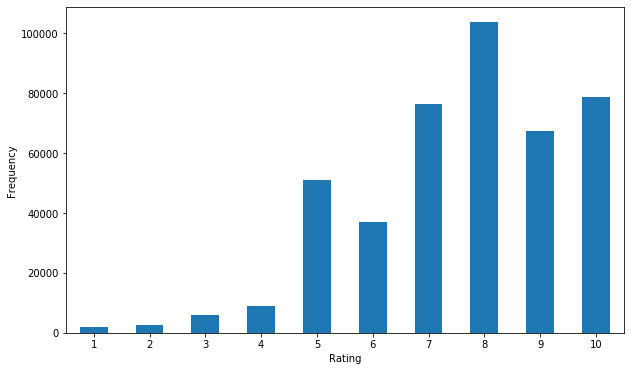

In [6]:
ax = bx_book_r["Book-Rating"].value_counts().sort_index().plot.bar(figsize=(10,6), rot=0)
ax.set(xlabel="Rating", ylabel="Frequency")
ax

In [7]:
# 
bx_br = bx_book_r[["ISBN", "Book-Rating"]].groupby("ISBN").agg(["mean", "count"]).join(bx_books.set_index("ISBN")).dropna()
bx_br.columns = ["Av Rating", "Ratings Count", 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']
bx_br

C:\Users\fergu\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,Av Rating,Ratings Count,Book-Title,Book-Author,Year-Of-Publication,Publisher
ISBN,,,,,,
0000913154,8.0,1,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster
0001046438,9.0,1,Liar,Stephen Fry,0,Harpercollins Uk
000104687X,6.0,1,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993,HarperCollins Publishers
0001047213,9.0,1,The Fighting Man,Gerald Seymour,1993,HarperCollins Publishers
0001047973,9.0,2,Brave New World,Aldous Huxley,1999,Trafalgar Square Publishing
...,...,...,...,...,...,...
B0001FZGPI,7.0,1,The Bonesetter's Daughter,Amy Tan,2001,Putnam Pub Group
B0001FZGRQ,9.0,1,The Clan of the Cave Bear,Jean M. Auel,2001,Crown Publishing Group
B0001GMSV2,8.0,2,Find Me,Rosie O'Donnell,2002,Warner Books


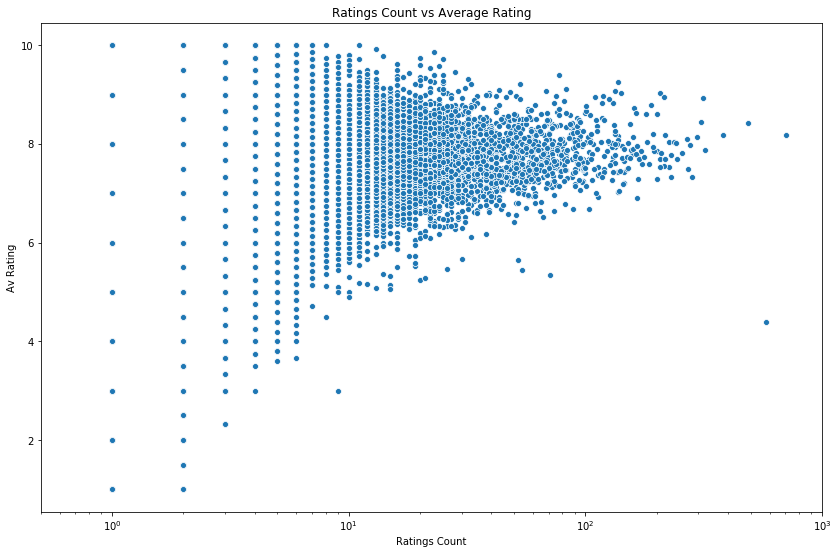

In [8]:
f, ax = plt.subplots(figsize=(14, 9))
ax.set(xscale="log", xlim=(0.5,1000))
ax.set_title("Ratings Count vs Average Rating")
sns.scatterplot("Ratings Count", "Av Rating", data=bx_br, ax=ax)

In [9]:
bx_br.nlargest(30, "Ratings Count")

,Av Rating,Ratings Count,Book-Title,Book-Author,Year-Of-Publication,Publisher
ISBN,,,,,,
0316666343,8.185290,707,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
0971880107,4.390706,581,Wild Animus,Rich Shapero,2004,Too Far
0385504209,8.435318,487,The Da Vinci Code,Dan Brown,2003,Doubleday
0312195516,8.182768,383,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
0060928336,7.887500,320,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
059035342X,8.939297,313,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
0142001740,8.452769,307,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
0446672211,8.142373,295,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books
044023722X,7.338078,281,A Painted House,John Grisham,2001,Dell Publishing Company


In [10]:
bx_br[bx_br["Ratings Count"]>100].sort_values("Av Rating",ascending=False).head(30)

,Av Rating,Ratings Count,Book-Title,Book-Author,Year-Of-Publication,Publisher
ISBN,,,,,,
0439139597,9.262774,137,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic
0439136369,9.082707,133,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2001,Scholastic
0439136350,9.035461,141,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,Scholastic
043935806X,9.033981,206,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
0590353403,8.983193,119,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,Scholastic
0439139600,8.954545,110,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2002,Scholastic Paperbacks
0446310786,8.943925,214,To Kill a Mockingbird,Harper Lee,1988,Little Brown &amp; Company
059035342X,8.939297,313,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
0439064864,8.920635,126,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999,Scholastic


In [11]:
bx_br[bx_br["Av Rating"]==10].sort_values("Ratings Count", ascending=False)

,Av Rating,Ratings Count,Book-Title,Book-Author,Year-Of-Publication,Publisher
ISBN,,,,,,
1888054557,10.0,11,Postmarked Yesteryear: 30 Rare Holiday Postcards,Pamela E. Apkarian-Russell,2001,Collectors Press
0394800893,10.0,8,The Sneetches and Other Stories,Dr. Seuss,1961,Random House Children's Books
089471838X,10.0,7,Natural California: A Postcard Book,Not Applicable (Na ),1990,Running Pr
1571456988,10.0,7,Uncle John's Supremely Satisfying Bathroom Rea...,Bathroom Readers Institute,2001,Bathroom Reader Press
0395282659,10.0,6,The Hobbit,J. R. R. Tolkien,1988,Houghton Mifflin Co
...,...,...,...,...,...,...
0534534600,10.0,1,Communication Between Cultures With Infotrac,Larry A. Samovar,2000,Thomson Learning
0534528252,10.0,1,The Place of Mind,Brian Cooney,1999,Wadsworth Publishing
0534526772,10.0,1,"Sight, Sound, Motion: Applied Media Aesthetics",Herbert Zettl,1998,Wadsworth Publishing


In [12]:
bx_br.reset_index(inplace=True)

In [13]:
bx_br["ISBN"] = bx_br["ISBN"].apply(lambda x: x.zfill(10))
bx_am = bx_br.set_index("ISBN").join(amazon32.set_index("ISBN_10"), how = "inner")

In [14]:
bx_am

,Av Rating,Ratings Count,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image,Image link,Title,Author,Num Genre,Genre
0006543588,8.0,1,Travels in Mauritania,Peter Hudson,1991,HarperCollins Publishers,0006543588.jpg,http://ecx.images-amazon.com/images/I/51KWxEu6...,Travels in Mauritania (Flamingo),Peter Hudson,29,Travel
0007100973,10.0,1,Dalai Lama's Book of Transformation,Dalai Lama,2001,Thorsons Publishers,0007100973.jpg,http://ecx.images-amazon.com/images/I/51657BBZ...,The Dalai Lama's Book of Transformation,His Holiness the Dalai Lama,21,Religion & Spirituality
000712032X,9.5,2,Rumi: Hidden Music,Maryam Mafi,2002,Thorsons Publishers,000712032X.jpg,http://ecx.images-amazon.com/images/I/51PDJ33J...,Rumi: Hidden Music,Maryam Mafi,21,Religion & Spirituality
0007134495,7.0,1,Parzival and the Stone from Heaven: A Grail Ro...,Lindsay Clarke,2002,Thorsons Publishers,0007134495.jpg,http://ecx.images-amazon.com/images/I/51CKV3K6...,Parzival and the Stone From Heaven: A Grail Ro...,Lindsay Clarke,24,Science Fiction & Fantasy
0007144350,10.0,2,Collins Complete Works of Oscar Wilde (Collins...,Oscar Wilde,2003,HarperCollins Publishers,0007144350.jpg,http://ecx.images-amazon.com/images/I/51Hdmf4y...,Complete Works of Oscar Wilde (Collins Classics),Oscar Wilde,15,Literature & Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...
4770020678,9.0,2,Totto-Chan: The Little Girl at the Window,Tetsuko Kuroyanagi,1984,Kodansha International (JPN),4770020678.jpg,http://ecx.images-amazon.com/images/I/41LRfZzW...,Totto-Chan: The Little Girl at the Window,Tetsuko Kuroyanagi,1,Biographies & Memoirs
8173711461,8.0,1,Wings of Fire: An Autobiography of APJ Abdul K...,A. P. J Abdul Kalam,1999,Distributed by Orient Longman,8173711461.jpg,http://ecx.images-amazon.com/images/I/51xMjbo2...,Wings of Fire: An Autobiography of APJ Abdul K...,A. P. J. Abdul Kalam,1,Biographies & Memoirs
8423935825,6.0,3,"Es Facil Dejar De Fumar, Si Sabes Como",Allen Carr,0,Espasa-Calpe SA,8423935825.jpg,http://ecx.images-amazon.com/images/I/51Ze1S-K...,Es Facil Dejar de Fumar Si Sabes Como (Spanish...,Allen Carr,11,"Health, Fitness & Dieting"
9748303683,9.0,1,Another Quiet American: Stories of Life in Laos,Brett Dakin,2003,Asia Books,9748303683.jpg,http://ecx.images-amazon.com/images/I/41fQPE0z...,Another Quiet American: Stories of Life in Laos,Brett Dakin,29,Travel


In [15]:
bx_am.corr()

,Av Rating,Ratings Count,Num Genre
Av Rating,1.000000,0.002762,-0.048407
Ratings Count,0.002762,1.000000,0.039647
Num Genre,-0.048407,0.039647,1.000000


In [16]:
GenRat = bx_am.pivot_table(index="Genre", values="Av Rating", aggfunc=["mean","count", np.std]).sort_values(("mean", "Av Rating"))
GenRat = GenRat[GenRat[("count", "Av Rating")]>=10]
GenRat

,mean,count,std
,Av Rating,Av Rating,Av Rating
Genre,,,
Travel,7.723152,228,1.584984
Business & Money,7.729947,116,1.819602
Self-Help,7.787983,177,1.442995
Teen & Young Adult,7.811095,165,1.728721
"Health, Fitness & Dieting",7.813233,373,1.747307
Sports & Outdoors,7.820725,122,1.635804
Gay & Lesbian,7.825108,77,1.569323
Politics & Social Sciences,7.836139,236,1.675424


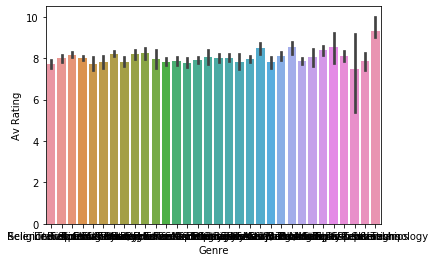

In [17]:
# bx_am.plot.bar("Genre", "Av Rating")
sns.barplot("Genre", "Av Rating", data = bx_am)

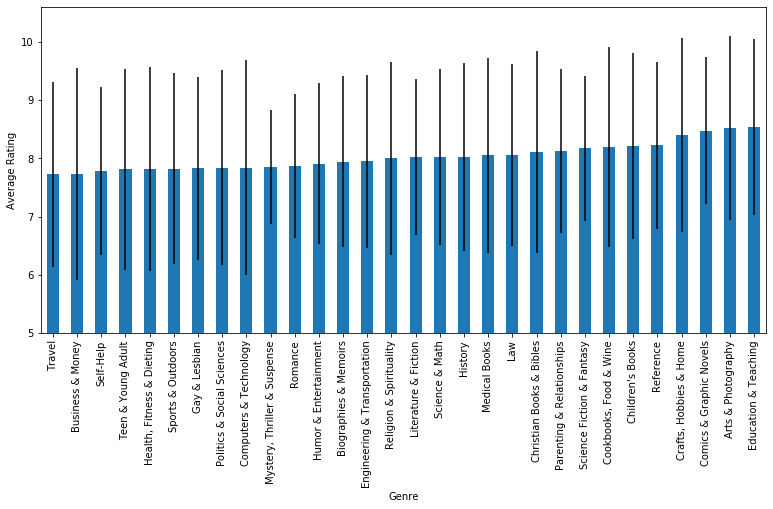

In [35]:
ax = GenRat.plot.bar(y=("mean", "Av Rating"), figsize=(13,6), legend=False, yerr=GenRat[("std", "Av Rating")])
ax.set(ylabel="Average Rating", ylim=(5,None))
ax.patch.set_alpha(0.4)
ax

In [29]:
ax.savefig('temp.png', transparent=True)

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [19]:
stats.ttest_ind(bx_am[bx_am["Genre"]=="Travel"]["Av Rating"], bx_am[bx_am["Genre"]!="Travel"]["Av Rating"])

Ttest_indResult(statistic=-2.8982628341354038, pvalue=0.0037646319657030024)

In [20]:
GenCount = bx_am.pivot_table(index="Genre", values="Ratings Count", aggfunc=["mean","count"]).sort_values(("mean", "Ratings Count"))
GenCount = GenCount[GenCount[("count", "Ratings Count")]>=10]
GenCount

,mean,count
,Ratings Count,Ratings Count
Genre,,
Education & Teaching,1.625000,16
Computers & Technology,1.635135,74
"Cookbooks, Food & Wine",1.755274,237
Arts & Photography,1.840000,100
"Health, Fitness & Dieting",1.938338,373
"Crafts, Hobbies & Home",2.049261,203
Gay & Lesbian,2.051948,77
Reference,2.079646,113


In [21]:
all_tables = bx_am.join(gr_books_10k.set_index("isbn"), how="inner")

In [22]:
GenRat2 = all_tables.pivot_table(index="Genre", values=["Av Rating", "average_rating"], aggfunc=["mean","count"]).sort_values(("mean", "Av Rating"))
GenRat2[("mean","average_rating")] = (GenRat2[("mean", "average_rating")]-1)*9/4+1
GenRat2 = GenRat2[GenRat2[("count", "Av Rating")]>=10]
GenRat2

mean                    count               
                             Av Rating average_rating Av Rating average_rating
Genre                                                                         
Teen & Young Adult            7.451282       7.678409        11             11
Business & Money              7.514286       7.822000        10             10
Health, Fitness & Dieting     7.757900       7.986250        12             12
Self-Help                     7.849014       7.976957        23             23
Politics & Social Sciences    7.980731       7.860089        28             28
Biographies & Memoirs         7.985232       7.919714        70             70
Literature & Fiction          7.991835       7.773601       184            184
Mystery, Thriller & Suspense  7.998440       7.769412        51             51
Romance                       8.010352       7.957132        34             34
Humor & Entertainment         8.062590       7.826765        34             34
Science & Math                8.127945       8.042500        20             20
Science Fiction & Fantasy     8.191607       7.907774        82             82
Christian Books & Bibles      8.278680       8.171875        16             16
History                       8.294103       8.053158        19             19
Children's Books              8.474205       8.072064        86             86
Comics & Graphic Novels       8.672599       8.327841        22             22
Arts & Photography            8.742424       7.868636        11             11

In [23]:
gr_books_10k

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,2767052,2792775,272,0439023483,9780439023480.0,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,2,3,3,4640799,491,0439554934,9780439554930.0,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,3,41865,41865,3212258,226,0316015849,9780316015840.0,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,4,2657,2657,3275794,487,0061120081,9780061120080.0,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267
4,5,4671,4671,245494,1356,0743273567,9780743273560.0,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,0441019455,9780441019460.0,Ilona Andrews,2010.0,Bayou Moon,"Bayou Moon (The Edge, #2)",eng,4.09,17204,18856,1180,105,575,3538,7860,6778
9996,9997,208324,208324,1084709,19,067973371X,9780679733710.0,Robert A. Caro,1990.0,Means of Ascent,"Means of Ascent (The Years of Lyndon Johnson, #2)",eng,4.25,12582,12952,395,303,551,1737,3389,6972
9997,9998,77431,77431,2393986,60,039330762X,9780393307630.0,Patrick O'Brian,1977.0,The Mauritius Command,The Mauritius Command,eng,4.35,9421,10733,374,11,111,1191,4240,5180
9998,9999,8565083,8565083,13433613,7,0061711527,9780061711530.0,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,Cinderella Ate My Daughter: Dispatches from th...,eng,3.65,11279,11994,1988,275,1002,3765,4577,2375


In [24]:
gr_books_k.corr()

,index,bookID,average_rating,num_pages,ratings_count,text_reviews_count
index,1.000000,0.998419,-0.034778,-0.027031,-0.079583,-0.083960
bookID,0.998419,1.000000,-0.036207,-0.026134,-0.076820,-0.081289
average_rating,-0.034778,-0.036207,1.000000,0.150477,0.038224,0.033663
num_pages,-0.027031,-0.026134,0.150477,1.000000,0.034337,0.036977
ratings_count,-0.079583,-0.076820,0.038224,0.034337,1.000000,0.865977
text_reviews_count,-0.083960,-0.081289,0.033663,0.036977,0.865977,1.000000


In [25]:
grkam32 = gr_books_k.set_index("isbn").join(amazon32.set_index("ISBN_10"), how = "inner")
grkam32

,index,bookID,title,authors,average_rating,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Image,Image link,Title,Author,Num Genre,Genre
0439785960,0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,0439785960.jpg,http://ecx.images-amazon.com/images/I/51NbOxBO...,Harry Potter and the Half-Blood Prince (Book 6),J.K. Rowling,15,Literature & Fiction
0439358078,1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,0439358078.jpg,http://ecx.images-amazon.com/images/I/51SfTd37...,Harry Potter And The Order Of The Phoenix,J. K. Rowling,15,Literature & Fiction
0345453743,8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books,0345453743.jpg,http://ecx.images-amazon.com/images/I/514lGrZn...,The Ultimate Hitchhiker's Guide to the Galaxy,Douglas Adams,24,Science Fiction & Fantasy
076790818X,12,21,A Short History of Nearly Everything,Bill Bryson,4.21,9780767908184,eng,544,248558,9396,9/14/2004,Broadway Books,076790818X.jpg,http://ecx.images-amazon.com/images/I/41Z3XNXT...,A Short History of Nearly Everything,Bill Bryson,23,Science & Math
0767915062,13,22,Bill Bryson's African Diary,Bill Bryson,3.44,9780767915069,eng,55,7270,499,12/3/2002,Broadway Books,0767915062.jpg,http://ecx.images-amazon.com/images/I/418I90Pc...,Bill Bryson's African Diary,Bill Bryson,1,Biographies & Memoirs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581348762,11050,45348,When the Darkness Will Not Lift: Doing What We...,John Piper,4.13,9781581348767,eng,79,1279,126,12/14/2006,Crossway Books,1581348762.jpg,http://ecx.images-amazon.com/images/I/41i84h62...,When the Darkness Will Not Lift: Doing What We...,John Piper,11,"Health, Fitness & Dieting"
1581348096,11052,45350,Suffering and the Sovereignty of God,John Piper/Justin Taylor/Mark Talbot/David A. ...,4.30,9781581348095,eng,254,652,47,9/13/2006,Crossway Books,1581348096.jpg,http://ecx.images-amazon.com/images/I/51XoZ4ZL...,Suffering and the Sovereignty of God,None,9,Christian Books & Bibles
1581342470,11055,45358,The Hidden Smile of God: The Fruit of Afflicti...,John Piper,4.34,9781581342475,eng,175,675,61,1/15/2001,Crossway Books,1581342470.jpg,http://ecx.images-amazon.com/images/I/41H63hHO...,The Hidden Smile of God: The Fruit of Afflicti...,John Piper,9,Christian Books & Bibles
0375847227,11081,45486,His Dark Materials (His Dark Materials #1-3),Philip Pullman,4.26,9780375847226,eng,933,2656,260,4/10/2007,Alfred A. Knopf,0375847227.jpg,http://ecx.images-amazon.com/images/I/51Wx8Vw8...,His Dark Materials Omnibus (The Golden Compass...,Philip Pullman,4,Children's Books


In [26]:
GenRat3 = grkam32.pivot_table(index="Genre", values="average_rating", aggfunc=["mean","count"]).sort_values(("mean", "average_rating"))
GenRat3 = GenRat3[GenRat3[("count", "average_rating")]>=10]
GenRat3

,mean,count
,average_rating,average_rating
Genre,,
Travel,3.883000,20
Teen & Young Adult,3.895000,30
Law,3.930833,12
Politics & Social Sciences,3.994947,95
"Crafts, Hobbies & Home",3.999412,17
"Health, Fitness & Dieting",4.000526,38
Business & Money,4.010357,28
Computers & Technology,4.016071,28


In [27]:
GenRat3[("mean", "average_rating")] = (GenRat3[("mean", "average_rating")]-1)*9/4+1
display_side_by_side(GenRat, GenRat3)

,mean,count,std
,Av Rating,Av Rating,Av Rating
Genre,,,
Travel,7.723152,228,1.584984
Business & Money,7.729947,116,1.819602
Self-Help,7.787983,177,1.442995
Teen & Young Adult,7.811095,165,1.728721
"Health, Fitness & Dieting",7.813233,373,1.747307
Sports & Outdoors,7.820725,122,1.635804
Gay & Lesbian,7.825108,77,1.569323
Politics & Social Sciences,7.836139,236,1.675424
